
 
<div style="background-color: lightblue; padding: 40px; font-size: 40px;">
    Hypothesis Testing
</div>
 


<div style="background-color:lightblue; padding: 40px;">
    Hypothesis testing is the process of comparing one hypothesis to another and using statistics to help evaluate the hypothesis. It is part of the branch of statistics known as Inferential Statistics.
</div>


<div style="background-color:lightblue; padding: 40px;">
Notes:-

H$_0$:  Null hypothesis is the status quo which usually reflects no change or no difference between things we are measuring.


H$_a$: Alternative hypothesis says that there is a difference or change between things we are measuring.


True positive: ex:'Check engine' light turns on and there is a problem.

True negative: ex:'Check engine light' remains off and everything is fine.

Type I errors: ex:'Check engine light' on, but everything is fine.Also called false positive: is false alarm.

Type II errors: ex:'Check engine light' stays off, but there is actually a problem. Also called false negative.
    
 </div>   

### Exercises

#### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be),then give an example of what a true positive, true negative, type I and type II errors would look like.Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### 1. Has the network latency gone up since we switched internet service providers?

In [49]:
# value: latency
# condition: latency before change, latency after change

H$_0$: There is no difference between the latency in internet since we switched internet service providers.


H$_a$: There is a difference between the latency in internet now than the latency from before we switched.

True positive:We said that there was a difference in latency and the difference in latency was indeed true( We rejected H$_0$, as H$_0$ was false).

True negative:We said that there was no difference in latency and there was in fact no difference in latency (We did not reject H$_0$, and H$_0$ was indeed true)   If we reject H0 and there is an improvement in network latency.

type I errors:We said there was a difference in the latency, but there in actuality was no difference in the latency.     

type II errors:We said there was no difference in the latency, but there was in fact a difference in the latency from before to after the switch.    

### 2. Is the website redesign any good?

In [ ]:
# value: User feedback or performance metrics 
# condition: user feedback or performance metrics before redesign and after redesign.

H$_0$: There is no difference or less engagement from the old design vs the new design times.

H$_a$:There is a measurable increase in engagement now that the website has been redesigned

True Positive: We said there was an increase in engagement and there was.

True Negative:We said there was no change or less engagement and it did not indeed increase

Type I Error: We said that there was an increase in engagement but there was not.

Type II Error: We said that engagement was the same or less than before but it actually increased

### 3. Is our television ad driving more sales?

In [ ]:
# value: Sales data 
# condition: sales data before and after running the television ad.

H$_0$:The sales average for our business is no different or less than it was before our television ad

H$_a$:The sales average is greater now than it was before running the ad.

True Positive: sales average has increased, and we said that it increased

True Negative: We stated that there was no change or less sales, and that was actually the case

Type I Error: We said that sales were greater now following our ad, but actually they did not change or were less

Type II Error: We said that sales were the same or less than they were before, but are actually increased now since the ad

<div style="background-color: lightblue; padding: 40px; font-size: 40px;">
    Correlation
</div>
 


<div style="background-color: lightblue; padding: 15px; font-size: 15px;">
Correlation tests are used to check if two samples are related. They are often used for feature selection and multivariate analysis in data preprocessing and exploration.


    
Comparing 2 Continuous Variables is Correlation

Check if two variables are related

Pearson's correlation coefficient or Pearson's r is the test statistic

tells us how much two variables tend to move together

For discrete or non-normal data: Spearman's rank correlation
</div>

A parametric test is a statistical test that makes specific assumptions about the underlying distribution of the data being analyzed. These assumptions typically involve the data following a specific probability distribution, most commonly the normal distribution. Parametric tests are designed to work with continuous data and are more powerful and accurate when the assumptions are met.
ex:- T-Test,ANOVA,Pearson's R


A non-parametric test is a statistical test that does not make specific assumptions about the underlying distribution of the data being analyzed. Unlike parametric tests, non-parametric tests do not require the data to follow a particular probability distribution, such as the normal distribution. Instead, they are designed to work with various types of data, including both continuous and discrete variables.

### 1. Answer with the type of stats test you would use (assume normal distribution):


### Is there a relationship between the length of your arm and the length of your foot?

Variables:Length of Arm (continuous), Length of Foot (continuous)
Therefore the statistical Test that we would use is Pearson correlation coefficient (parametric test) or Spearman's

### Does smoking affect when or not someone has lung cancer?

Variables: Smoking (categorical: Yes or No), Lung Cancer (categorical: Yes or No)

Statistical Test: Chi-square test of independence (non-parametric test)to assess whether there is a significant association between two categorical variables.


### Is gender independent of a person’s blood type?

Variables:Gender (categorical: Male or Female), Blood Type (categorical: A, B, AB, O, etc.)
Statistical Test: Chi-square test of independence (non-parametric test) to assess whether there is a significant association between two categorical variables.



### Does whether or not a person has a cat or dog affect whether they live in an apartment?

Variables:Pet Ownership (categorical: Cat, Dog, None), Residence Type (categorical: Apartment or Other)

Statistical Test: Chi-square test of independence (non-parametric test) to assess whether there is a significant association between pet ownership and residence type.

### Does the length of time of the lecture correlate with a student's grade?

Variables:Lecture Length (continuous), Student's Grade (continuous or categorical)
Statistical Test: Pearson correlation coefficient (parametric test) to assess the linear relationship between lecture length and student's grade.


### The choice of the statistical test depends on the type of data and the nature of the relationship between the variables. For continuous data and assessing the strength and direction of a linear relationship, Pearson correlation coefficient is suitable . 


### For categorical data and investigating the association between two variables, Chi-square test of independence is appropriate . It's important to note that assumptions about normality, sample size, and study design should be considered when choosing the appropriate test.

### 2. Use the telco_churn data.


In [3]:
#standard ds imports
import pandas as pd
import numpy as np
#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
#custom imports
import env
import os
#stats imports
from scipy import stats
#ignore pink warnings
import warnings
warnings.filterwarnings("ignore")
from sqlalchemy import create_engine, text



In [108]:
def get_db_url(db, username=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

In [109]:
#bring in. the data frame we are using
url = get_db_url('telco_churn')
query = ('SELECT * FROM customers')
engine = create_engine(url)

In [110]:
#
df = pd.read_sql(query, engine.connect())
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


Another way to read in telco data is to save it to a csv and bring it in.


df = pd.read_csv('telco_normalized.csv')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [ ]:
We have 21 columns of mixed datatypes.
We might need to do some 'cleaning'

In [ ]:
Step-by-Step:
State our hypothesis, set alpha value

2. Select the data, run .info
3. Plot the data
4. Test for assumputions: Is there normality?
5. Run stats test
6. Draw Conclusions


### A. Does tenure correlate with monthly charges?

In [ ]:
Note:
Break it down:
tenure: continuous

monthly_charges: continuous


We will have to use a Spearmans or Pearsons test.

Step 1: State Hypothesis & Set 

H$_0$: There is no linear correlation between tenure & monthly charges

H$_a$: There IS a linear correlation between tenure & monthly charges

In [9]:
#set alpha
α = 0.05

Step 2: Select data and run .info

In [11]:
# select the data
charges_df = df[['monthly_charges', 'tenure']]
charges_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  7043 non-null   float64
 1   tenure           7043 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


In [ ]:
Takeaways:
We are dealing with two continious variables.
Pearson's for normally distributed data
Spearman's for non-normally distributed data

<Axes: xlabel='tenure', ylabel='monthly_charges'>

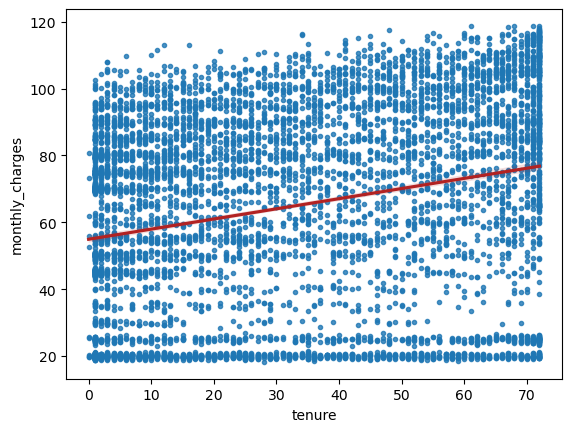

In [13]:
#Step 3: Plot data

sns.regplot(x='tenure', y='monthly_charges', data=charges_df, marker='.', line_kws={'color': 'firebrick'})
    

In [ ]:
Hint: If there is variable that corresponds with time- put that on the "x-axis"


In [ ]:
Step 4: Test for Assumptions (distributions)

<Axes: >

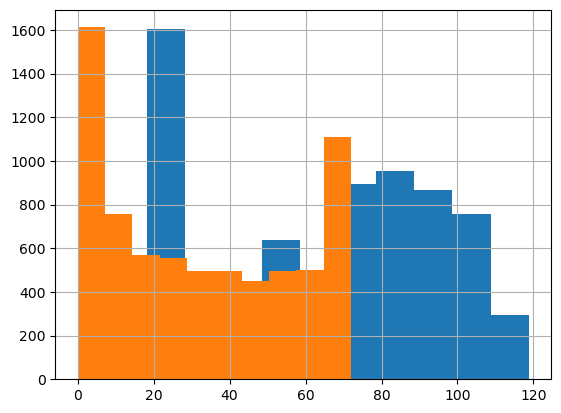

In [14]:
#visual test of distribution for monthly charges
charges_df.monthly_charges.hist()

#visual test of distribution for tenure
charges_df.tenure.hist()

In [15]:
#create a new function
def eval_dist(r, p, α=0.05):
    '''
    This function takes in r, p and alpha values
    then returns normal distribution print statement,
    if the p value is greater than alpha.
    Or not normal distribution print statement otherwise.
    '''
    if p > α:
        return print(f"""The data is normally distributed""")
    else:
        return print(f"""The data is NOT normally distributed""")

In [ ]:
You can use a Shapiro Test to confirm normalcy.

In [16]:
#import shapiro test 
from scipy.stats import shapiro 

In [17]:
#get r and p values using stats library
r,p = stats.shapiro(df.monthly_charges)

#see those values
r,p

(0.9208889007568359, 0.0)

In [18]:
#using the function we created
eval_dist(r,p)

The data is NOT normally distributed


In [19]:
#let's get the stats for tenure
r,p = stats.shapiro(df.tenure)

#see those values
r,p

(0.9037512540817261, 0.0)

In [20]:
#use the function we created
eval_dist(r,p)

The data is NOT normally distributed


Note:
We now know that tenure and monthly charges are NOT normally distributed, so we cannot use a Pearson's test but we can use a Spearman's!

In [ ]:
Step 5: Run stats Tests

In [21]:
#Since our features are not normally distributed, use Spearman
sr,sp = stats.spearmanr(charges_df.tenure, charges_df.monthly_charges)
sr,sp

(0.27641678933130215, 1.0271266876409408e-123)

In [ ]:
Step 6: Draw Conclusions

In [27]:
def eval_Sresult(r, p, α=0.05):
    if p < α:
        return print(f"""Reject the null hypothesis. There is a linear correlation.
Spearman’s r: {r:2f}
P-value: {p}""")
    else:
        return print(f"""We fail to reject the null hypothesis that there is a linear correlation.
Spearman’s r: {r:2f}
P-value: {p}""")

In [23]:
eval_Sresult(sr,sp)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.276417
P-value: 1.0271266876409408e-123


Takeaways:
There is a correlation between monthly charges and tenure.

- With an r of .28, we can say the correlation is positive "weak-moderate".


### 2.b. Total charges?

In [ ]:
Note:
Break it down:
tenure: continuous

total_charges: continuous


We will have to use a Spearmans or Pearsons test.

Step 1: State Hypothesis & Set 

H$_0$: There is no linear correlation between tenure and total charges

H$_a$: There is a linear correlation between tenure and total charges

In [ ]:
#set the alpha
α = 0.05

In [ ]:
Step 2: Select data and run .info

In [26]:
#create a df of only tenture and total charges
ttl_charges_df = df[['tenure', 'total_charges']]

In [27]:
#take a look at that data
ttl_charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tenure         7043 non-null   int64 
 1   total_charges  7043 non-null   object
dtypes: int64(1), object(1)
memory usage: 110.2+ KB


In [ ]:
Hint: use '.sort_values()'' to see if you have any "weird" values that need to be converted.
(ex) ttl_charges_df.total_charges.sort_values()


In [28]:
ttl_charges_df.sort_values('total_charges')


,tenure,total_charges
2855,0,
3118,0,
3052,0,
5433,0,
1731,0,
...,...,...
5868,51,997.75
4298,55,998.1
4173,13,999.45
3162,12,999.8


In [29]:
#covert empty space into '0'
#change datatype to float
ttl_charges_df['total_charges']= ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')

In [30]:
#make sure our changes took place
ttl_charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tenure         7043 non-null   int64  
 1   total_charges  7043 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


In [ ]:
Step 3: Plot data

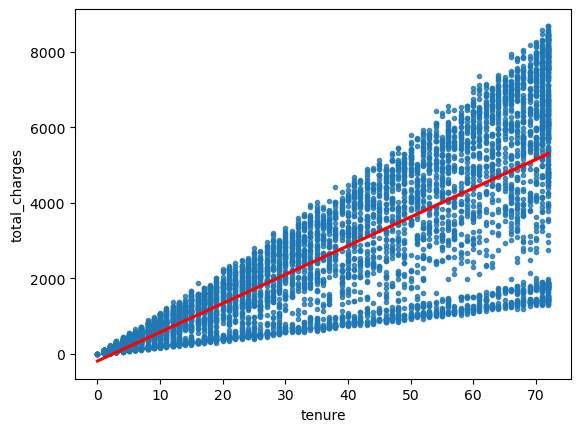

In [32]:
#plot our data
sns.regplot(x='tenure', y = 'total_charges', data=ttl_charges_df, marker='.', line_kws={'color': 'red'})
plt.show()

In [ ]:
Step 4: Test for Assumptions (distributions)



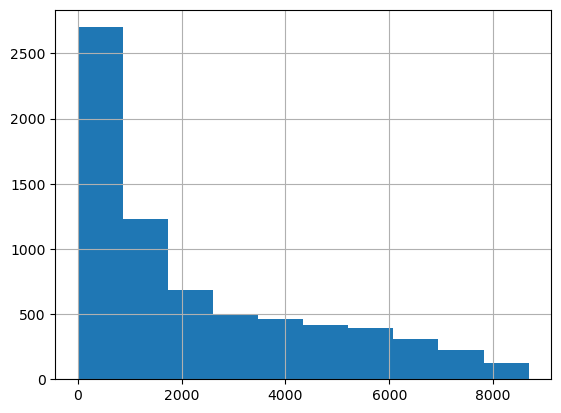

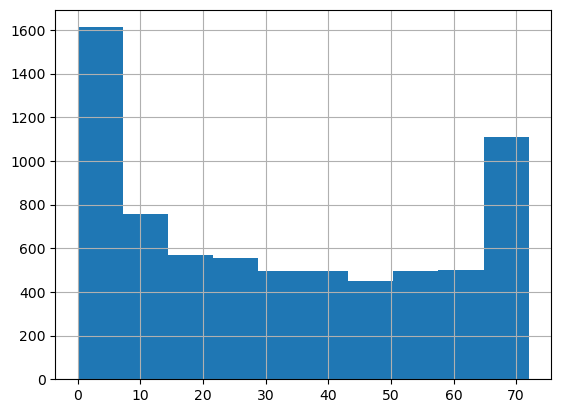

In [33]:
#visual check for distribution of total charges
ttl_charges_df.total_charges.hist()
plt.show()

#visual check for distribution of tenure
ttl_charges_df.tenure.hist()
plt.show()

In [ ]:
Note:
We can see visually that the data is not normally distributed.

We have already done a Shapiro test on tenure and confirmed it is not normally distributed

Let's do the same to confirm total charges

In [34]:
#get r and p values using stats library
r,p = stats.shapiro(ttl_charges_df.total_charges)

#see those values
r,p

(0.8601521253585815, 0.0)

In [35]:
#using the function we created
eval_dist(r,p)

The data is NOT normally distributed


In [ ]:
Note:
We have confirmed, both visually and statistically, that our features are NOT normally distributed so we must use Spearman's.



In [ ]:
Step 5: Run stats Tests

In [37]:
# Since it's not normally distributed, use Spearman
sr,sp = stats.spearmanr(ttl_charges_df.tenure, ttl_charges_df.total_charges)
sr,sp


(0.8896957900597577, 0.0)

In [ ]:
Step 6: Draw Conclusions

In [38]:
eval_Sresult(sr,sp)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.889696
P-value: 0.0


In [ ]:
Takeaways:
There is a linear correlation between tenure and total charges


With an r of .89, it is a strong positive correlation.

### 2c. What happens if you control for phone and internet service?

In [ ]:
Note:
Break it down:
tenure: continuous

monthly_charges (for customers with phone and internet): continuous


We will have to use a Spearmans or Pearsons test.

In [ ]:
Step 1: State Hypothesis & Set α

Of customers who have only phone service:

H$_0$: There is no linear correlation between tenure and monthly charges of phone & internet customers

H$_a$: There is a linaer correlation between tenure and monthly charges of phone & internet customers


In [40]:
# set α
α = 0.05

In [ ]:
Step 2: Select data and run .info



In [41]:
#create a dataframe of only customers with phone service 
#and internet service type 1
phone_df = df[(df.phone_service == "Yes") & (df.internet_service_type_id == 1)][['monthly_charges', 'tenure']]

In [42]:
#look at our dataframe
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1739 entries, 0 to 7041
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  1739 non-null   float64
 1   tenure           1739 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 40.8 KB


In [ ]:
Step 3: Plot data

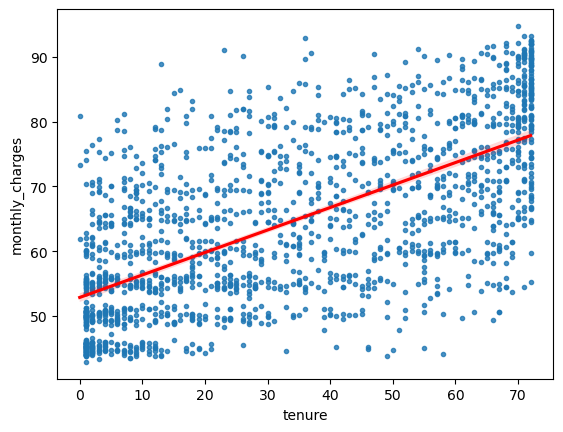

In [44]:
#visualize the data
sns.regplot(x='tenure', y = 'monthly_charges', data=phone_df, marker='.', line_kws={'color': 'red'})
plt.show()

In [ ]:
Step 4: Test for Assumptions (distributions)



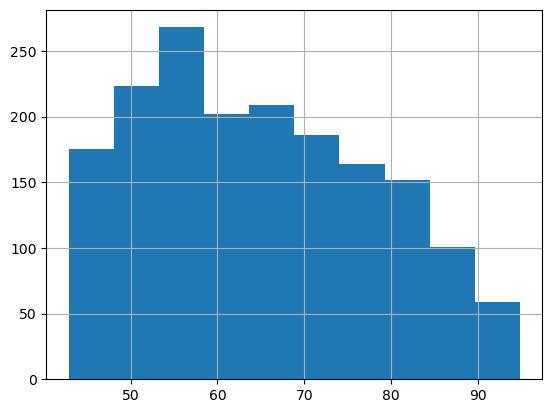

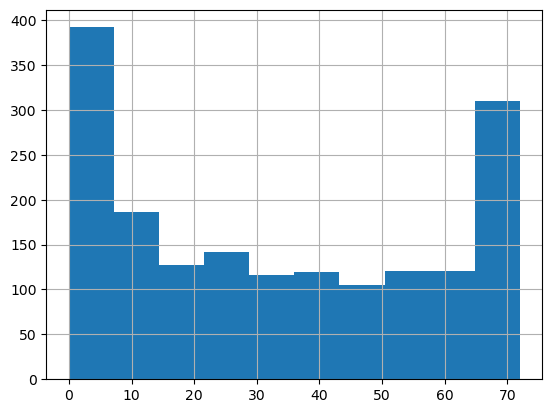

In [45]:
#visualization of distribution for monthly charges
phone_df.monthly_charges.hist()
plt.show()

#visualization of distribution for monthly
phone_df.tenure.hist()
plt.show()

In [ ]:
Note:
We can see visually that the tenure data is not normally distributed.

Let's run a Shapiro test on tenure and monthly charges to confirmed it is not normally distributed

In [46]:
#shapiro for monthly charges
r,p = stats.shapiro(phone_df.monthly_charges)

#see those values
r,p

(0.9584369659423828, 7.019588771857106e-22)

In [47]:
#using the function we created
eval_dist(r,p)


The data is NOT normally distributed


In [48]:
#shapiro for tenure
r,p = stats.shapiro(phone_df.tenure)

#see those values
r,p

(0.8991788029670715, 2.3523856297437335e-32)

In [49]:
#using the function we created
eval_dist(r,p)

The data is NOT normally distributed


Note:
We have now confirmed statistically and visually that our features are not normally distributed, so we will run a Spearman's test!

In [ ]:
Step 5: Run stats Tests

In [50]:
sr,sp = stats.spearmanr(phone_df.tenure, phone_df.monthly_charges)
sr,sp

(0.6644708508462759, 5.423601644635052e-222)

In [ ]:
Step 6: Draw Conclusions

In [51]:
eval_Sresult(r,p)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.899179
P-value: 2.3523856297437335e-32


Takeaways:


There is a moderate-strong positive correlation between tenure and monthly charges for customers who have only phone & internet service.


### 3. Use the employees database.

In [106]:
def get_db_url(db, username=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'


In [107]:
#bring in. the data frame we are using
url_emp = get_db_url('employees')
#query = ('SELECT * FROM customers')
engine = create_engine(url)

In [60]:
#set sql query
query = '''
select * from (
    select 
        e.emp_no
        ,salary
        ,e.hire_date
        ,case when s.to_date = '9999-01-01' 
            then (select MAX(to_date) from salaries where to_date != '9999-01-01')
            else s.to_date
            end as to_date
        ,row_number() over(partition by e.emp_no, e.hire_date order by s.to_date DESC) rn
    from employees e
    join salaries s on s.emp_no = e.emp_no
 ) a where rn = 1;
        '''

In [61]:
alt_query = '''
SELECT * 
FROM employees
JOIN salaries USING (emp_no)
WHERE to_date = '9999-01-01';
'''

In [62]:
#read in sql query
df = pd.read_sql(alt_query, url_emp)

In [63]:
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
dtypes: int64(2), object(7)
memory usage: 16.5+ MB


### 3a. Is there a relationship between how long an employee has been with the company and their salary?

In [ ]:
Note:
Break it down:
tenure: continuous

salary: continuous


We will have to use a Spearmans or Pearsons test.

Step 1: State Hypothesis & Set 

H$_0$: There is no linear correlation between tenure and salary
    
H$_a$: There is a linear correlation between tenure and salary

In [ ]:
# set α
α = 0.05

In [ ]:
Step 2: Select data and run .info

In [66]:
#subtract dates to get tenure
(df.to_date - df.hire_date)

0         2926512 days, 0:00:00
1         2926729 days, 0:00:00
2         2926449 days, 0:00:00
3         2926354 days, 0:00:00
4         2925338 days, 0:00:00
                  ...          
240119    2924120 days, 0:00:00
240120    2924958 days, 0:00:00
240121    2926578 days, 0:00:00
240122    2923846 days, 0:00:00
240123    2922337 days, 0:00:00
Length: 240124, dtype: object

In [67]:
(df.to_date - df.hire_date).astype(str).str.split(' ', expand = True)


,0,1,2
0,2926512,"days,",0:00:00
1,2926729,"days,",0:00:00
2,2926449,"days,",0:00:00
3,2926354,"days,",0:00:00
4,2925338,"days,",0:00:00
...,...,...,...
240119,2924120,"days,",0:00:00
240120,2924958,"days,",0:00:00
240121,2926578,"days,",0:00:00
240122,2923846,"days,",0:00:00


In [68]:
#create a tenure column
df['tenure'] = (df.to_date - df.hire_date).astype(str).str.split(' ', expand = True)[0]

In [69]:
#turn this into an integer
df.tenure = df.tenure.astype(int)

In [70]:
#create the dataframe with the info we want
tenure_df = df[['tenure', 'salary']]

In [71]:
#make sure the right data is in our dataframe
tenure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   tenure  240124 non-null  int64
 1   salary  240124 non-null  int64
dtypes: int64(2)
memory usage: 3.7 MB


In [72]:
tenure_df.head()

,tenure,salary
0,2926512,88958
1,2926729,72527
2,2926449,43311
3,2926354,74057
4,2925338,94692


In [ ]:
Step 3: Plot data

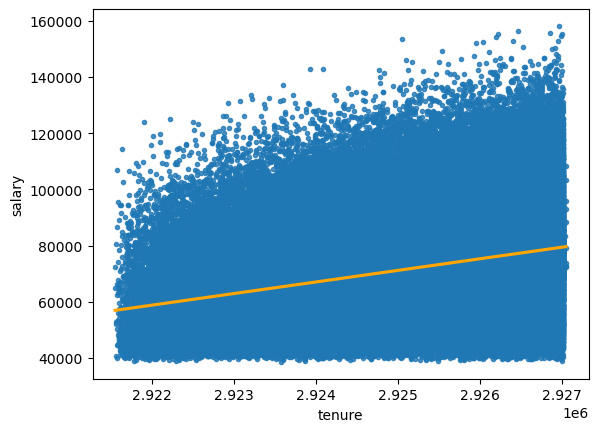

In [74]:
#plot tenure vs salary
sns.regplot(x='tenure', y = 'salary', data=tenure_df, marker='.', line_kws={'color': 'orange'})
plt.show()

In [ ]:
Step 4: Test for Assumptions (distributions)

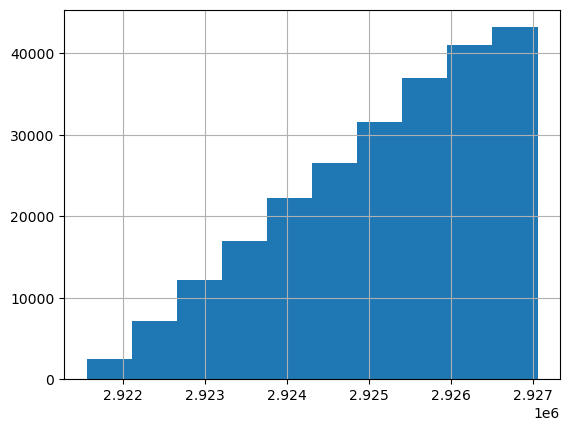

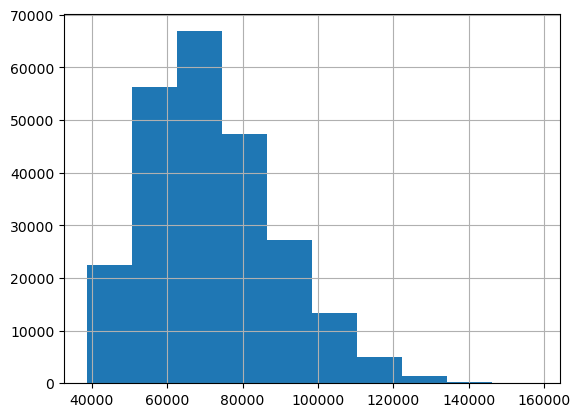

In [75]:
#visualize distribution for tenure
tenure_df.tenure.hist()
plt.show()

#visualize distribution for salary
tenure_df.salary.hist()
plt.show()

In [ ]:
Note:

We can see visually that the tenure and salary data is not normally distributed.

Let's run a Shapiro test on tenure and salary to confirmed it is not normally distributed.

In [76]:
#shapiro for tenure
r,p = stats.shapiro(tenure_df.tenure)

#see those values
r,p


(0.9476065635681152, 0.0)

In [77]:
#using the function we created
eval_dist(r,p)

The data is NOT normally distributed


In [78]:
#shapiro for tenure
r,p = stats.shapiro(tenure_df.salary)

#see those values
r,p

(0.968895435333252, 0.0)

In [79]:
#using the function we created
eval_dist(r,p)

The data is NOT normally distributed


Note:

We have now confirmed statistically and visually that our features are not normally distributed, so we will run a Spearman's test!

In [ ]:
Step 5: Run stats Tests

In [80]:
# Since it's not normally distributed, use Spearman
sr,sp = stats.spearmanr(tenure_df.tenure, tenure_df.salary)

#look at our results
sr,sp

(0.3128783525010577, 0.0)

In [ ]:
Step 6: Draw Conclusions

In [81]:
eval_Sresult(sr,sp)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.312878
P-value: 0.0


In [ ]:
Takeaways:
We reject the null hypothesis. There is a weak positive correlation between tenure and salary.

### 3b. Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [ ]:
Note:
Break it down:
number of titles: discrete (1,2,3)

tenure: continuous


We will have to use an ANOVA or Kruskal Wallis test.



Step 1: State Hypothesis & Set 

H$_0$: There is no correlation between tenure and number of titles

H$_a$: There is a correlation between tenure and number of titles

In [84]:
# set α
α = 0.05
df

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,2926512
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,2926729
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,2926449
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,2926354
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,2925338
...,...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,52868,2002-06-01,9999-01-01,2924120
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,69501,2002-05-12,9999-01-01,2924958
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01,2926578
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01,2923846


In [ ]:
Step 2: Select data and run .info

In [85]:
#set sql query
query = '''
select 
    t.emp_no, 
    count(t.title) AS num_titles, 
    te.tenure
from titles t
join (select 
        emp_no, 
        datediff(now(), min(from_date)) AS tenure 
      from titles
      group by emp_no
      having max(to_date) = '9999-01-01') te 
on t.emp_no = te.emp_no
group by t.emp_no;        
'''

In [86]:
#read in sql query
df = pd.read_sql(query, url_emp)

In [87]:
df.head()

,emp_no,num_titles,tenure
0,10001,1,13558
1,10002,1,9867
2,10003,1,10111
3,10004,2,13400
4,10005,2,12384


In [88]:
#create dataframe with only number of titles and tenure
df = df[['num_titles', 'tenure']]

In [89]:
#look at that data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   num_titles  240124 non-null  int64
 1   tenure      240124 non-null  int64
dtypes: int64(2)
memory usage: 3.7 MB


In [ ]:
Step 3: Plot data

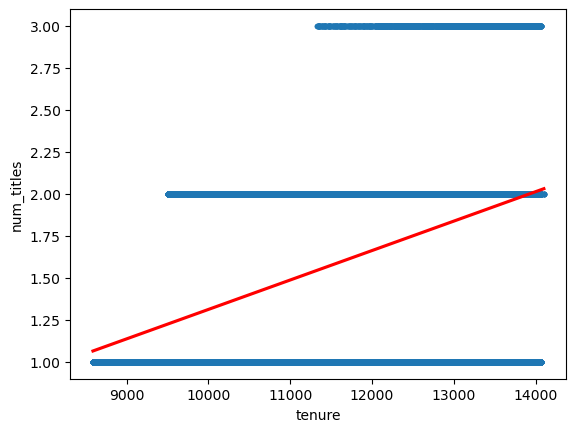

In [91]:
#visualize tenure and number of titles
sns.regplot(x='tenure', y = 'num_titles', data=df, marker='.', line_kws={'color': 'red'})
plt.show()

Note:
Because the number of titles is a discrete value, we should run an ANOVA or a Kruskal Wallis test to test whether the average salary of those with 1 title is different from those with 2, or 2 different from 3, etc

In [ ]:
Step 4: Test for Assumptions (distributions)

In [ ]:
Assumptions:


- do we have equal variance?
- are there enough observations?
- are they independent of each other?


In [92]:
#are there enough observations? (more than __)
df.num_titles.value_counts()

num_titles
2    125345
1    111892
3      2887
Name: count, dtype: int64

In [ ]:
Note:
Levene's Test: Test the assumption of equal variance of spending score for the 2 groups.

In [93]:
#do we have equal variance?
stats.levene(df.num_titles, df.tenure)

LeveneResult(statistic=718602.1569097865, pvalue=0.0)

In [ ]:
The variances are significantly different; therefore we will use the Kruskal Wallis test.

In [ ]:
Step 5: Run stats Tests

New H$_0$

H$_0$= The median is the same for the various number of titles

In [ ]:
Hα = The median is not equal for the various number of titles

In [ ]:
Reference: Kruskal Wallis Tutorial

In [95]:
stats.kruskal(df.num_titles, df.tenure)


KruskalResult(statistic=371488.64419334417, pvalue=0.0)

In [ ]:
Step 6: Draw Conclusions



<Axes: title={'center': 'tenure'}, xlabel='num_titles'>

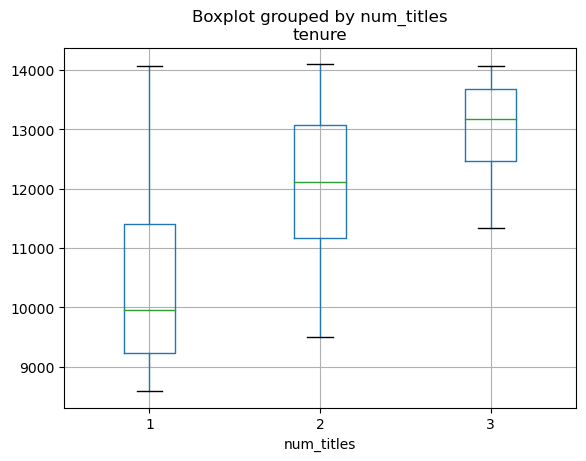

In [96]:
df.boxplot('tenure', by='num_titles')


Takeaways:
We reject 
, the tenure median is not equal for the various number of titles.
There is a difference in tenure and number of titles an employee has held.

### 4. Use the sleepstudy data.

In [2]:
#import datasets
from pydataset import data

In [8]:
#assign dataframe to sleepstudy data
df = data('sleepstudy')

In [9]:
#take a look
df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


### 4a. Is there a relationship between days and reaction time?

In [ ]:
Note:
Break it down:
days: continuous

reaction time: continuous


We will have to use a Spearmans or Pearsons test.

Step 1: State Hypothesis & Set α

H$_0$: There is no linear correlation between days and reaction time

H$_a$: There is a linear correlation between days and reaction time

In [11]:
# set α
α = 0.05

In [ ]:
Step 2: Select data and run .info



In [12]:
#create the dataframe with only reaction and days
react_df = df[['Reaction','Days']]


In [13]:
#look at data
react_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 1 to 180
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [14]:
#take a look
react_df.head()

,Reaction,Days
1,249.5600,0
2,258.7047,1
3,250.8006,2
4,321.4398,3
5,356.8519,4


In [ ]:
Step 3: Plot data

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

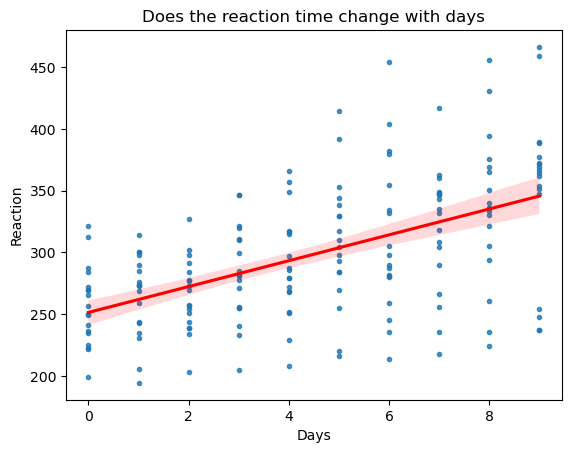

In [21]:
#plot relationships
sns.regplot(data=react_df, x='Days', y='Reaction', marker='.', line_kws=({'color': 'red'}))

plt.title('Does the reaction time change with days')
plt.show()

In [ ]:
Step 4: Test for Assumptions (distributions)

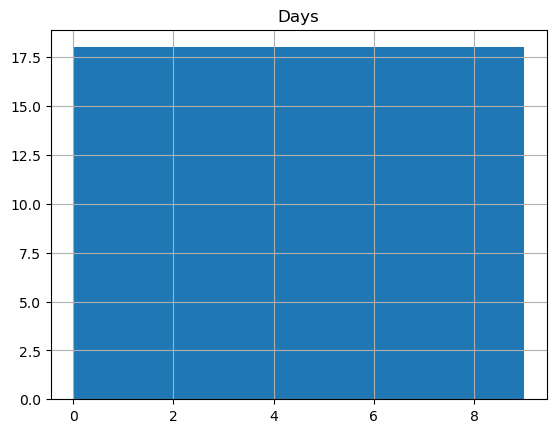

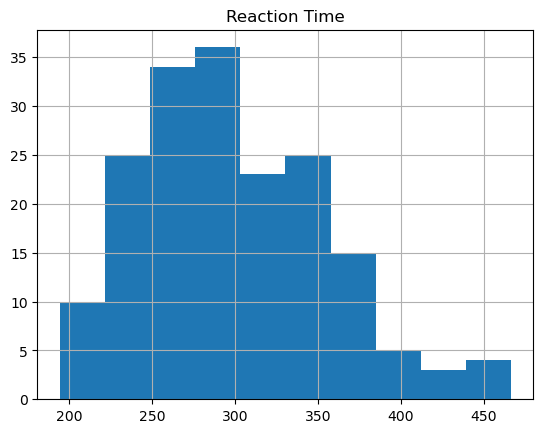

In [22]:
#visualize the distribution of days
react_df.Days.hist()
plt.title('Days')
plt.show()

#visualize the distribution of reaction time
react_df.Reaction.hist()
plt.title('Reaction Time')
plt.show()

In [ ]:
Note:
Days appear to be uniformly distributed so we know we'll need to run a Spearman's test.

In [ ]:
Step 5: Run stats Tests

In [24]:
from scipy import stats

In [25]:
# Since BOTH are not normally distributed, use Spearman
r,p = stats.spearmanr(react_df.Days, react_df.Reaction)
r,p

(0.5228138502259547, 5.132878057706873e-14)

In [ ]:
Step 6: Draw Conclusions

In [28]:
eval_Sresult(r,p)
#eval_Sresult(sr,sp)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.522814
P-value: 5.132878057706873e-14


In [ ]:
Takeaways:
With a r of 0.52, there is a moderate positive correlation between days and reaction time

<div style="background-color: lightblue; padding: 40px; font-size: 40px;">
   
Comparison of Means
</div>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
import scipy.stats as stats
from pydataset import data

### 1. Answer with the type of test you would use (assume normal distribution):



### 1.a. Is there a difference in grades of students on the second floor compared to grades of all students?


variable:grades of students
type of variable :continous variable

Is there a second variable I'm comparing grades to?
no,but looking at two different slices of grades

test type:means test: a single continuous variable across categories

One sample! Comparing grades of second floor students to all students 
(all students in this case represents our population)

Two tailed! We are just asking if the grades of second floor students are different,
not that they are specifically higher or lower.

conclusion:
One-sample, two-tailed t-test: This test can determine if there is a significant difference in the grades of students on the second floor compared to the grades of all students in the entire population.

### 2.Are adults who drink milk taller than adults who don't drink milk? Is the price of gas higher in Texas or in New Mexico? 

variable:height
type of variable :A continuous var (height) across two categories (drink milk v not drink milk)
category:drink milk vs not drink milk is the category that we are separating height by
test type:means test: a single continuous variable,height across categories
Samples: Two: drink milk vs not drink milk
One Tailed: two tailed would be asking if there was a difference 

What type of test( means test, a proportions test, or a correlation test)?
means test: a single continuous variable across categories

conclusion:
Independent two sample ,one tailed t-test- this test can access whethere there is a significant difference in
the average height between two groups :adults who drink milk and adults who don't drink milk.


### 3. Is the price of gas higher in Texas or in New Mexico?


Variable: gasoline price\
Category across variable: State (Tx vs NM)
single continuous variable across two categories: means test!
T test stipulations:
Tails?: One: price of gas specifically higher (not just different)
Samples?: Two: Texas vs New Mexico specifically

conclusion:
Independent (two-sample) samples, one-tail t-test: This test can compare the average price of gas in two independent groups, Texas and New Mexico, to determine if there is a significant difference between the two.

### 4.Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

Variable(s): stress level (continuous(?))
Categories of stress: CAP, DS, WD
What type of test?
three categories, one continuous variable:
technically a means test, but more specifically:
Analysis of variance (ANOVA, (f-oneway))
What if stress is a discrete variable?
If it manifested as low, medium, high
Then we are looking at three different categories:
(low, medium, high) X (Cap, ds, wd)
proportion test! χ^2 test!

conclusion:
One-way analysis of variance (ANOVA): This test can analyze whether there are significant differences in stress levels among three or more groups (data science students, web development students, and cloud academy students).

### Step-by-Step 
### 1. Plot distribution 
### 2. Set Hypothesis 
### 3. Set Alpha 
### 4. Verify 3 Assumptions 
### 5. Compute Test Statistics 
### 6. Decide

### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance. 

In [ ]:
compare average time selling homes is different at 2 offices

- office 1: sample size = 40, mean= 90, stddev = 15
- office 2: sample size= 50, mean= 100, stddev = 20
- alpha = .05

In [ ]:
We are comparing: average time (numeric/continuous) vs two offices (distinct/categorical)
We will use:

2 sample t-test: comparing two offices
2 tailed: want to know if the average is larger OR smaller in either office

In [ ]:
Step 1: Plot Distribution

In [278]:
#stats.norm(mean, std).rvs(# samples)
office_1 = stats.norm(90, 15).rvs(40)
office_2 = stats.norm(100, 20).rvs(50)

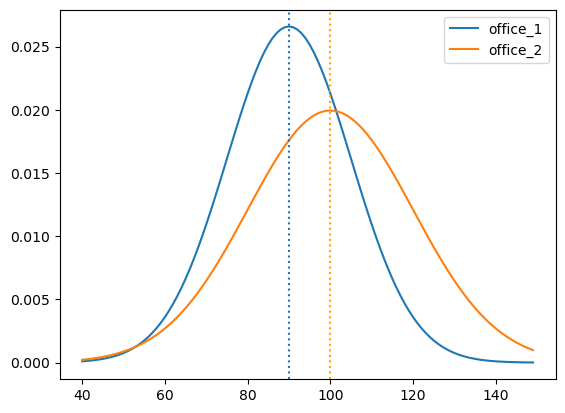

In [279]:
x= np.arange(40,150)

y1 = stats.norm(90,15).pdf(x) #this gives graph for office 1
y2 = stats.norm(100,20).pdf(x) #this gives graph for office 2

plt.plot(x, y1, label='office_1')
plt.plot(x,y2, label = 'office_2')
plt.axvline(90, ls=':')
plt.axvline(100, ls=':', color='orange')

plt.legend()
plt.show()


In [282]:
#let's get the average time to sell homes of office 1
avg_y1 = np.mean(y1)
avg_y1

0.009087128324877411

In [283]:
#let's get the average time to sell homes of office 2
avg_y2= np.mean(y2)
avg_y2

0.009019101164009186

In [ ]:
Step 2: Set Hypothesis
: The variance in office 1 is equivalent to the variance in office 2


: The variance in office 2 is inequal to the variance in office 1


In [ ]:
Step 3: Set Alpha

In [284]:
#we can use our typical alpha for this example
α = .05

In [ ]:
Step 4: Verify Assumptions

In [ ]:
We need to ask ourselves:
Are the samples independent?
YES, two seperate data sets
Is there normality?
YES, there is normal distribution visually
YES, sample sizes are 50 and 40
Is there equal variance?
False (see below)

In [ ]:
2. Is there normality?

In [285]:
# to find sample size- must more than 30 to meet assumption
len(office_1), len(office_2)

(40, 50)

In [ ]:
3 Is there equal variance?

In [286]:
#this shows the variance is not the same. must set variance to false
y1.var(), y2.var()

(8.839047447475672e-05, 4.684978789008453e-05)

In [287]:
#we can also do a levene test
stat, p_val = stats.levene(office_1, office_2)

In [289]:
if p_val < 0.05:
    print('We can reject H0 ==> inequal variance')

In [ ]:
Step 5: Compute Test Statistics

In [290]:
# 2 sample. 2 tailed
t, p = stats.ttest_ind(office_1, office_2, equal_var=False)
t, p, α

(-2.2540603709401337, 0.026711914454238823, 0.05)

In [291]:
p < α

True

In [295]:
#Levene test for equal variance


In [ ]:
if they are different, so 2 tailed test here

In [299]:
print('P-Value:', p)
if p < alpha:
    print('Our p-value is less than alpha and we can reject the null hypothesis, indicating some difference in the sales time between the offices')


P-Value: 0.026711914454238823
Our p-value is less than alpha and we can reject the null hypothesis, indicating some difference in the sales time between the offices


In [ ]:
#or

In [1]:
# tabular data
import numpy as np
import pandas as pd
# stats from scipy
from scipy import stats
# matplotlib for visualizations
import matplotlib.pyplot as plt

In [ ]:
# Looking at these two samples:
# 40 sales from office #1:
# distributed with a mean of 90 days and a std of 15 days
# 50 sales from office #2:
# distributed with a mean 100 days and a standard deviation of 20 days

In [ ]:
# stats.ttest_ind_from_stats?

In [2]:
# simulations of the offices in two different ways:
# way 1: use numpy's normal random sample
office_1 = np.random.normal(90, 15, size=(40,))
office_2 = np.random.normal(100, 20, size=(50,))
# alternatively, another simulation method:
# using stats to simulate a normal dist and then take Random ValueS
office_1 = stats.norm(90,15)
office_2 = stats.norm(100,20)


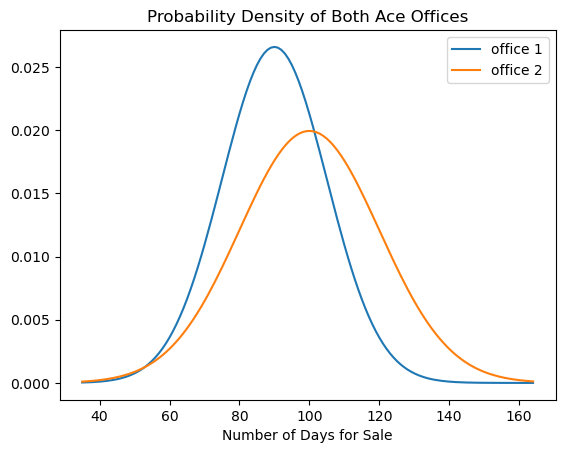

In [3]:
# a little bit of extra exploration:
x = np.arange(35, 165)
y1 = [office_1.pdf(n) for n in x]
y2 = [office_2.pdf(n) for n in x]
plt.plot(x, y1, label='office 1')
plt.plot(x, y2, label='office 2')
plt.legend()
plt.title('Probability Density of Both Ace Offices')
plt.xlabel('Number of Days for Sale')
plt.show()

In [ ]:
# option 1:
# use the simulations that I just created
# option 2: use ttest_ind_from_stats

In [ ]:
# option 1:
# lets take the two simulated versions
# Parameters:
# We know they are normal specifically because we defined them as so
# Do we know that they have equal variance?
# Well we know the stds are different,
# but lets see what a levene test says


In [5]:
# Levene Set-Up
# H0: The variance in office 1 sales is equivalent to office 2 sales
# H1: the variance in office 1 sales is different from office 2
# confidence level: standard, 95% ==? 0.95
#  ==> alpha: 0.05
lv_stat, p = stats.levene(office_1.rvs(40), office_2.rvs(50))
if p < 0.05:
    print('I can reject H0')
else:
    print('We fail to reject h0')

We fail to reject h0


In [ ]:
# we fail to reject the null hypothesis, which means that
# we cannot assert that these have different variances
# which means that students ttest will do.

In [ ]:
H0 : There is no difference in the average sale time between office 1 and office 2
Ha : There is a difference in the average sale time for office 1 to office 2

In [6]:
def test_hypothesis(p, 
                    stat, 
                    tails='two', 
                    direction='greater',
                    α=0.05):
    '''
    test_hypothesis will take in a p value and a test statistic
    if p is less than a presumed alpha, then we  will reject
    our null hypothesis
    
    this takes in two positional arguments,
    p stat, a float value representing the probability of serendipity
    stat, a float value representing the test statistic
    
    with the keyword arguments f tails, direction, and alpha,
    the operator is able to change the control structrure in order
    to perform a one-tailed ttest if so desired
    '''
    if tails == 'two':
        if p < α:
            print(f'We can reject our null hypothesis!.\n Our p-value is {p} \n Our statistic value is {stat}')
        else:
            print(f'We fail to reject the null hypothesis :(.\n Our p-value is {p}.\n Our statistic is {stat}')
    else:
        if direction == 'greater':
            if ((p/2) < α) and (stat > 0):
                print(f'We can reject our null hypothesis!.\n Our p-value is {p} \n Our statistic value is {stat}')
            else:
                print(f'We fail to reject the null hypothesis :(.\n Our p-value is {p}.\n Our statistic is {stat}')
        else:
            if ((p/2) < α) and (stat < 0):
                print(f'We can reject our null hypothesis!.\n Our p-value is {p} \n Our statistic value is {stat}')
            else:
                print(f'We fail to reject the null hypothesis :(.\n Our p-value is {p}.\n Our statistic is {stat}')

In [7]:
# alpha: 0.05
α = 0.05
t_stat, p = stats.ttest_ind(
    office_1.rvs(40),
    office_2.rvs(50),
    equal_var=True)

In [8]:
t_stat

-2.145595015783937

In [9]:
p

0.0346591159133516

In [10]:
test_hypothesis(p, t_stat)

We can reject our null hypothesis!.
 Our p-value is 0.0346591159133516 
 Our statistic value is -2.145595015783937


In [ ]:
# stats.ttest_ind_from_stats?

In [11]:
# solve this the other way:
t_stat, p = stats.ttest_ind_from_stats(
    90,
    15,
    40,
    100,
    20,
    50
)

In [12]:
t_stat

-2.6252287036468456

In [13]:
p

0.01020985244923939

In [14]:
test_hypothesis(p, t_stat)

We can reject our null hypothesis!.
 Our p-value is 0.01020985244923939 
 Our statistic value is -2.6252287036468456


### 3. Load the mpg dataset and use it to answer the following questions:





In [58]:
from pydataset import data

In [59]:
#import the data
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### 3.a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [ ]:
H0: There is no difference in gas mileage between cars from 2008 and cars from 1999.
Ha: Cars from 2008 have higher fuel efficiency than cars from 1999.

In [60]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [ ]:
# lets create a new column for fuel efficiency based on
# the average between city and highway mileage


In [ ]:
# stats.hmean((mpg.cty, mpg.hwy))

In [37]:
# reassign mpg into a version of itself
# but this time with a new column called fuel_e
# that holds the harmonic mean between city and highway mileage
mpg = mpg.assign(fuel_e = stats.hmean((mpg.cty, mpg.hwy)))

In [38]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  fuel_e        234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


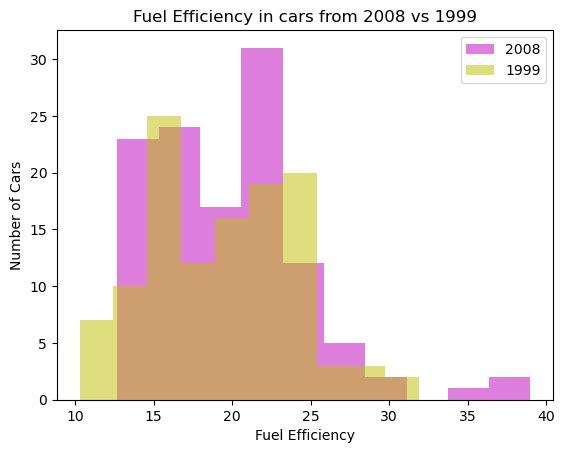

In [44]:
# Plot the two data sets
df_year_2008 = mpg[mpg['year'] == 1999]['fuel_e']

df_year_1999 = mpg[mpg['year'] == 2008]['fuel_e']

plt.hist(df_year_2008, alpha=0.5, label='2008',color='m')
plt.hist(df_year_1999, alpha=0.5, label='1999',color='y')
plt.title('Fuel Efficiency in cars from 2008 vs 1999')
plt.xlabel('Fuel Efficiency')
plt.ylabel('Number of Cars')
plt.legend()
plt.show()


In [ ]:
# same flow chart from before:
# what variables am I examining?
# fuel efficiency! I just created it! Its continuous! Its one thing!
# Fuel efficiency across two categories, though!
# years of vehicles in 99 vs vehicles from '08

In [22]:
mpg.year.unique()

array([1999, 2008])

In [ ]:
# If I want to proceed forward with testing here:
# mpg dataframe, where the mpg dataframe year is 1999 ==> specifically the fuel_e Series
# mpg dataframe where mpg dataframe year is 2008 ==> specifically the fuel_e Series

In [23]:
fuel_2008 = mpg[mpg.year == 2008].fuel_e
fuel_1999 = mpg[mpg.year == 1999].fuel_e

In [ ]:
# to continue with means testing:
# normality
# variance
# independence

In [24]:
# normality? 
fuel_2008.shape

(117,)

In [25]:
fuel_1999.shape

(117,)

In [ ]:
# so I have 117 samples for each, I'll toss that in with CLT assumptions
# but put a pin in it to revisit

In [26]:
# variance:
# lets run a levene test:
# H0: the variance is equivalent for 99 vehicles compared to 2008 vehicles
# Ha: the variance is different for 99 vehicles compared to 08 vehicles
lev_stat, p = stats.levene(fuel_1999, fuel_2008)
test_hypothesis(p, lev_stat)


We fail to reject the null hypothesis :(.
 Our p-value is 0.8602339200830025.
 Our statistic is 0.031071867429515194


In [27]:
# independence? We know that there are no samples in this dataframe
# that are 2008 and 1999.  These are exclusive.
# 
# two tailed ==> we want to know if there is a difference in general
# two sampled ==> 1999 vs 2008, not one of those against all cars
# proceeding forward with our means test:
t_stat, p = stats.ttest_ind(fuel_1999,
                            fuel_2008,
                            equal_var=True)
test_hypothesis(p, t_stat)
    

We fail to reject the null hypothesis :(.
 Our p-value is 0.7635345888327115.
 Our statistic is 0.3011962975077886


### 3.b Are compact cars more fuel-efficient than the average car?

In [ ]:
# one sample or two sample?
# one sample: compact cars vs all cars
# one tail or two tailed?
# one tailed: *more* fuel efficient

In [28]:
mpg['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [29]:
# so lets proceed forward with a one-tailed one sample test!
# just the compact cars from mpg, specifically the fuel efficiency:
fuel_compact = mpg[mpg['class'] == 'compact'].fuel_e

In [ ]:
# stats.ttest_1samp?

In [30]:
# calculate the population mean for fuel efficiency
μ = mpg.fuel_e.mean()

In [31]:
t_stat, p = stats.ttest_1samp(fuel_compact,
                              μ)

In [32]:
t_stat

7.512360093161361

In [33]:
p

1.5617666348807277e-09

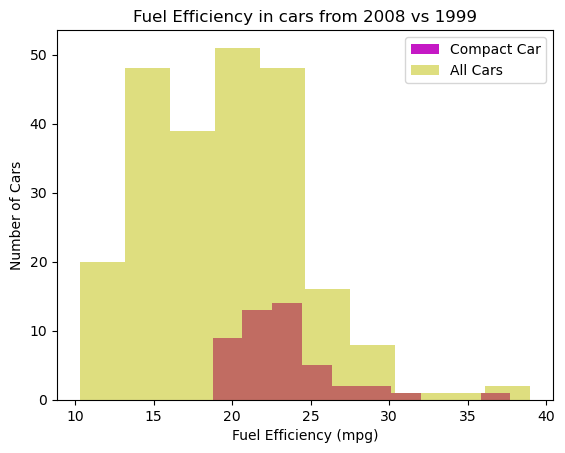

In [47]:
# Create a DataFrame for compact class cars
dfcomp = mpg[mpg['class'] == 'compact'].fuel_e

# Create a DataFrame for all cars
dfall = mpg[['fuel_e']]

plt.hist(dfcomp, alpha=0.9, label='Compact Car',color='m')
plt.hist(dfall, alpha=0.5, label='All Cars',color='y')
plt.title('Fuel Efficiency in cars from 2008 vs 1999')
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('Number of Cars')
plt.legend()
plt.show()

In [ ]:
H0 : The fuel efficiency of compact cars is the same or less than the fuel efficiency of cars overall
Ha : The fuel efficiency of compact cars is greater than the fuel efficiency of cars overall

In [34]:
test_hypothesis?

In [35]:
# I want to test that 
# the fuel efficiency of compact cars is greater,
# so my t_stat should be positive if I reject my H0
# and I want to check p/2 against alpha instead of just p.
# this is handled
# based on the way we defined test_hypothesis
# and the fact that we fed in our arguments
# as the sample we compared against
# the population, 
# which the alternative hypothesis was looking for a difference
# in the greater-than direction.
# the positive tail of the t-distribution)
test_hypothesis(p,
                t_stat,
                tails='one')

We can reject our null hypothesis!.
 Our p-value is 1.5617666348807277e-09 
 Our statistic value is 7.512360093161361


### 3.c. Do manual cars get better gas mileage than automatic cars?

In [73]:
# pandas refresher:
# mpg dataframe
# mpg
# just the transmission series:
# mpg.trans
# the values inside of the trans column but lowercase:
# needs a .str to do a string method on the values in that series
# mpg.trans.str.lower() ==> note parens on lower because method
# the output of that method is still a series full of strings
mpg.trans.str.lower().head(5)

1      auto(l5)
2    manual(m5)
3    manual(m6)
4      auto(av)
5      auto(l5)
Name: trans, dtype: object

In [74]:
# my god, its full of strings
# take those lower case strings
# and just check to see if the first letter is 'a':
# this will return a boolean because its a logic check:
mpg.trans.str.lower().str.startswith('a')

1       True
2      False
3      False
4       True
5       True
       ...  
230     True
231    False
232     True
233    False
234     True
Name: trans, Length: 234, dtype: bool

In [75]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  is_auto       234 non-null    bool   
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 22.2+ KB


In [51]:
# if I tossed values in there with a np.where, etc
# then I would be needing to do a mask that looked a little more
# like
# mpg[mpg.is_auto == 'auto']
# but:

In [76]:
# if I assign it as a bool directly:
mpg['is_auto'] = mpg.trans.str.lower().str.startswith('a')
# then I can use that info directly as a mask since it already renders
# as a boolean

In [ ]:
manual_fe = mpg[~mpg.is_auto].fuel_e
auto_fe = mpg[mpg.is_auto].fuel_e

In [ ]:
Set up our hypothesis test:

H0: Manual vehicles get the same mileage as automatic vehicles or manual vehicles in fact get lower average mileage than automatic vehicles
Ha: Manual vehicles get a better average mileage than automatic vehicles

In [ ]:
# parameters:
# enough samples ==> presume normality (shapiro if we are picky)\
# (if shapiro fails, do a mann-whitneyu test)
# assert equal variance:
# lets do a quick levene


In [40]:
# H0: auto and manual mpg have equal variance
# Ha: ato and manual mpg have inequal variance
lev_stat, p = stats.levene(manual_fe, auto_fe)
test_hypothesis(p, lev_stat)

We fail to reject the null hypothesis :(.
 Our p-value is 0.9062462281015493.
 Our statistic is 0.013901207169738269


In [41]:
# lets do our means test
# one tailed!
# we want to check that manual cars may get better fuel efficience
# we want to check that manual vehicle mpg > auto vehicle mpg
# so we will feed them that order, and expect t_stat > 0 in order
# to reject the null hypothesis
# if man.mpg > auto.mpg ==> positive t_stat ==> reject null if p(/2) is also OK
t_stat, p = stats.ttest_ind(
    manual_fe,
    auto_fe,
    equal_var=True)
test_hypothesis(p,
                t_stat,
                tails='one',
               α=0.05)

We can reject our null hypothesis!.
 Our p-value is 5.510464610044009e-06 
 Our statistic value is 4.652577547151351



<div style="background-color: lightblue; padding: 40px; font-size: 40px;">    
Comparison of Groups
</div>

In [188]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
import scipy.stats as stats
from pydataset import data
from env import get_db_url
from sqlalchemy import create_engine, text


In [ ]:
What is a Chi Square test?

The Chi Square test is used to determine whether there is a statistically significant difference between the expected and observed frequencies in one or more categories. Observations are classfied into mutually exclusive classes. In other words, it is a way of testing for group membership.
So What?

The chi square test works by comparing the observed/actual contingency table against the expected/predicted contingency table that would be the case if group membership in the variables were independent.
Were people with a higher ticket class on the Titanic more likely to survive?

𝐻0
  = Survival rate is independent of ticket class.

𝐻𝑎
  = Survival rate is not independent of ticket class.

Does the type of service package a customer has affect the likelihood that she will churn?

𝐻0
  = Churn is independent of type of service package.

𝐻𝑎
  = Churn is not independent of type of service package.

Now What?

ctab = pd.crosstab(df.Series, df.Series)

ctab == observed values

chi2, p, degf, expected = stats.chi2_contingency(ctab)

expected == the values we would expect to see if the variables were independent of each other

### 1. Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other.

 	                       Codeup Student    -	     Not Codeup Student
   -----------------------------------------------------------------------------                        
    Uses a Macbook	         49	            -          20
    Doesn't Use A Macbook  	  1	            -          30

H$_0$: There is no association between using a Macbook and being a Codeup student.



H$_a$:There is an association between using a Macbook and being a Codeup student.

In [271]:
#create the given table into a dataframe
df = pd.DataFrame({'codeup student': [49, 1], 'Not codeup student': [20, 30]}, index = ['Mac User', 'Not Mac User'])

df

,codeup student,Not codeup student
Mac User,49,20
Not Mac User,1,30


In [272]:
confidence_level = .95
alpha = round(1 - confidence_level,2)
alpha

0.05

In [273]:
#chi-squared test
#Chi2, p, degf, expected = stats.chi2_contingency(df)
chi2, p, degf, expected = stats.chi2_contingency(df)


In [276]:
#Results printed:
print(f'Chi2-value is {chi2:.4f}')
print(f'p-value is {p:.4f}')

if p > alpha:
    print('P-value is greater than alpha, hence null hypothesis is rejected.')
else:
    print('P-value is less than alpha, fail to reject the null hypothesis(i.e alternative hypothesis is rejected)')
  

Chi2-value is 36.6526
p-value is 0.0000
P-value is less than alpha, fail to reject the null hypothesis(i.e alternative hypothesis is rejected)


Conclusion:
conclusion would be that the data did not show sufficient statistical evidence to support the idea that using a Macbook is associated with being a Codeup student. In other words, based on the analysis conducted, there is no significant relationship between using a Macbook and being a Codeup student according to the available data.

### 2. Choose another 2 categorical variables from the mpg dataset.

State your null and alternative hypotheses.
State your alpha.
Perform a 
c
h
i
2
 test of independence.
State your conclusion

In [263]:
from pydataset import data

Steps:-
Aquire data
Create Hypothesis - Null Hypothesis: The two variables are independent.
Set your confidence level and alpha
Calculate Test Statistic - run chi square test and use p-value to decide whether to reject the Null Hypothesis 
that the variables or categories are independent.

In [246]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Hypothesis:

H$_0$ :Null hypothesis:There is no association between city mileage and manufacturer

H$_a$ :Alternative hypothesis:There is association between city mileage and manufacturer

In [247]:
confidence_level = .95
alpha = round(1 - confidence_level,2)
alpha

0.05

In [261]:
ctab = pd.crosstab(mpg.cty, mpg.manufacturer)
ctab.sample(5)

manufacturer,audi,chevrolet,dodge,ford,honda,hyundai,jeep,land rover,lincoln,mercury,nissan,pontiac,subaru,toyota,volkswagen
cty,,,,,,,,,,,,,,,
18,4,2,1,2,0,4,0,0,0,0,1,2,3,5,2
9,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0
23,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0
19,1,1,0,0,0,3,0,0,0,0,5,0,5,1,4
14,0,4,4,5,0,0,2,0,0,1,2,0,0,1,0


In [262]:
chi2_stat, p_val, dof, expected = chi2_contingency(ctab)
print(f"Chi-squared statistic: {chi2_stat:.2f}")
print(f"P-value: {p_val:.4f}")

if p_val > alpha:
    print('P-value is greater than alpha, hence null hypothesis is rejected.')
else:
    print('P-value is less than alpha, fail to reject the null hypothesis(i.e alternative hypothesis is rejected)')
  

Chi-squared statistic: 527.49
P-value: 0.0000
P-value is less than alpha, fail to reject the null hypothesis(i.e alternative hypothesis is rejected)


Conclusion:
city mileage and manufacturer, are not significantly associated based on the data and analysis conducted.There isn't enough statistical evidence to support the claim that there is an association between these two variables

### 3. Use the data from the employees database to answer these questions:

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
Is an employee's gender independent of whether or not they are or have been a manager?


In [196]:
# select the data
url = get_db_url('employees')


### 3.a Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees) 

Hypothesis:-


H$_0$: Null Hypothesis: Gender has no effect on an employee's likelihood of working in the sales or marketing department.

H$_a$: Alternative Hypothesis: Gender is a factor that influences an employee's probability of working in the sales or marketing department.


In [211]:
query = '''
SELECT e.emp_no, e.gender, dp.dept_name, de.to_date
FROM employees AS e
JOIN dept_emp AS de ON e.emp_no = de.emp_no
JOIN departments AS dp ON de.dept_no = dp.dept_no
WHERE dp.dept_name = 'Sales' OR dp.dept_name = 'Marketing'
AND de.to_date > NOW();
'''

In [214]:
emp_pd = pd.read_sql(query, url)
emp_pd.head()

,emp_no,gender,dept_name,to_date
0,10017,F,Marketing,9999-01-01
1,10058,M,Marketing,9999-01-01
2,10140,F,Marketing,9999-01-01
3,10228,F,Marketing,9999-01-01
4,10239,F,Marketing,9999-01-01


In [236]:
from scipy.stats import chi2_contingency


#For a 95% confidence level, the significance level (alpha) is 0.05.
confidence_level = .95
alpha = round(1 - confidence_level,2)
alpha


# Creating contingency table:
contingency_tab_gender_dptname_tbl = pd.crosstab(emp_pd['gender'], emp_pd['dept_name'])

# Doing chi-squared test for independence:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_tab_gender_dptname_tbl)

#chi-squared(chi2) test results:
print(f"Chi-squared(chi2) statistic value: {chi2_stat:.2f}")
print(f"P-value: {p_val:.5f}")

if p_val > alpha:
    print('P-value is greater than alpha, hence null hypothesis is rejected.')
else:
    print('P-value is less than alpha, fail to reject the null hypothesis(i.e alternative hypothesis is rejected)')
  

Chi-squared(chi2) statistic value: 7.89
P-value: 0.44448
P-value is greater than alpha, hence null hypothesis is rejected.


Conclusion:
Conclusion would be that gender does have an effect on an employee's likelihood of working in the sales or marketing department. In other words, there is a statistically significant association between gender and department assignment (sales/marketing).

In [ ]:
Notes:
# chi-squared statistic is used to determine 
#if there is a significant association between categorical variables in a contingency table




### 3.b Is an employee's gender independent of whether or not they are or have been a manager?


In [230]:
from datetime import datetime

Hypothesis:-

H$_0$: Null Hypothesis:There is no association of employee's gender on becoming a manager

H$_a$: Alternative Hypothesis:There is association of employee's gender on becoming a manager

In [231]:
#retrieve data using the below query
query = text("SELECT e.emp_no, e.gender,d.dept_name, dm.to_date FROM dept_manager AS dm RIGHT JOIN employees AS e ON dm.emp_no = e.emp_no LEFT JOIN departments AS d ON dm.dept_no = d.dept_no;")
#data retrieved is used to create a dataframe emp_pd 
mgr_pd = pd.read_sql(query, url)
# Display the random 20 rows of the DataFrame
mgr_pd.sample(20)

,emp_no,gender,dept_name,to_date
11392,21393,M,None,None
227877,427853,F,None,None
294220,494196,M,None,None
85824,95825,F,None,None
239792,439768,M,None,None
79640,89641,M,None,None
102212,202188,M,None,None
100485,200461,M,None,None
185214,285190,M,None,None
1880,11881,M,None,None


In [235]:

#For a 95% confidence level, the significance level (alpha) is 0.05.
confidence_level = .95
alpha = round(1 - confidence_level,2)
alpha


#creates a new column 'is_current_manager' in the DataFrame mgr_pd, where each row contains a boolean value 
#indicating whether the employee is currently a manager based on their 'to_date' value.
mgr_pd['is_current_manager'] = mgr_pd['to_date'].isnull() | (mgr_pd['to_date'] > datetime.now().date())

# Create the contingency table:
contingency_tab_gender_cur_mgr_tbl = pd.crosstab(mgr_pd['gender'], mgr_pd['is_current_manager'])



## Creating contingency table:
#contingency_tab_gender_dptname_tbl = pd.crosstab(mgr_pd['gender'], mgr_pd['dept_name'], mgr_pd['to_date'])

# Doing chi-squared test for independence:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_tab_gender_cur_mgr_tbl)

#chi-squared(chi2) test results:
print(f"Chi-squared(chi2) statistic value: {chi2_stat:.2f}")
print(f"P-value: {p_val:.5f}")

if p_val > alpha:
    print('P-value is greater than alpha, hence null hypothesis is rejected.')
else:
    print('P-value is less than alpha, fail to reject the null hypothesis(i.e alternative hypothesis is rejected)')
  

Chi-squared(chi2) statistic value: 1.73
P-value: 0.18801
P-value is greater than alpha, hence null hypothesis is rejected.


Conclusion:
Conclusion would be that there is evidence to suggest that there is indeed an association between an employee's gender and their likelihood of becoming a manager. In other words, gender does have an effect on the probability of an employee becoming a manager, according to the analysis conducted.